In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth ,SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [67]:
df = pd.read_csv("Mall_Customers.csv")

In [68]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [70]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [71]:
column_drop = 'CustomerID'

In [72]:
df.drop(column_drop, axis=1, inplace = True)

<Axes: >

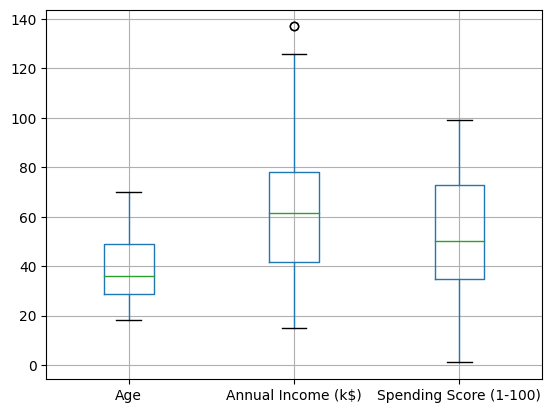

In [73]:
df.boxplot()

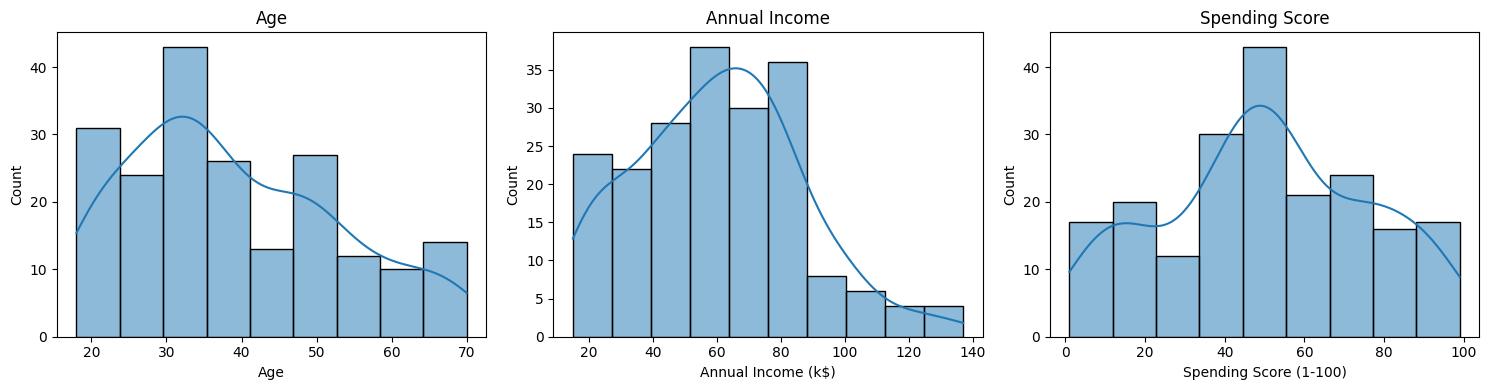

In [74]:
plt.figure(figsize=(15, 4))


plt.subplot(1, 3, 1)
sns.histplot(data=df['Age'], kde=True)
plt.title('Age')
plt.xlabel('Age')


plt.subplot(1, 3, 2)
sns.histplot(data=df['Annual Income (k$)'], kde=True)
plt.title('Annual Income')
plt.xlabel('Annual Income (k$)')


plt.subplot(1, 3, 3)
sns.histplot(data=df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score')
plt.xlabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

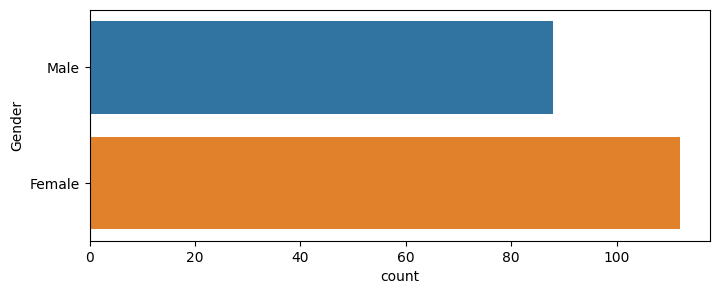

In [75]:
plt.figure(figsize = (8, 3))
sns.countplot(y = df['Gender'])
plt.show()

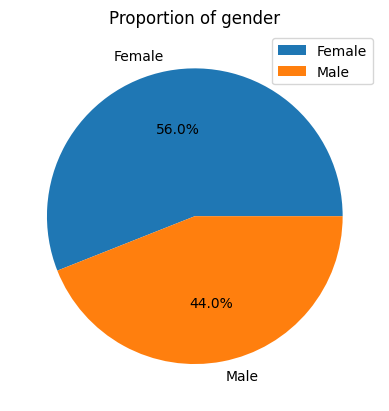

In [76]:
plt.pie(df['Gender'].value_counts(),labels = ["Female","Male"],autopct ="%.01f%%")
plt.legend(["Female","Male"])
plt.title('Proportion of gender')
plt.show()

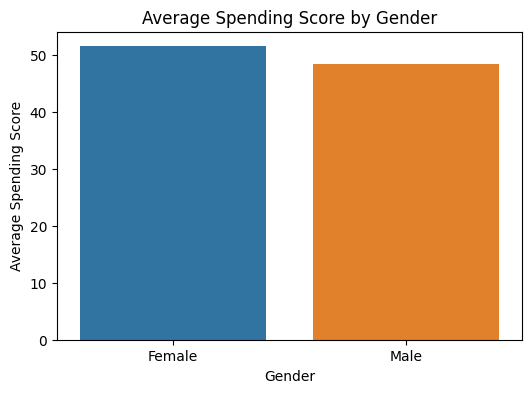

In [77]:
mean_scores = df.groupby('Gender')['Spending Score (1-100)'].mean()


plt.figure(figsize=(6, 4))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Gender')
plt.show()

In [78]:
bin_edges = [18, 25, 35, 45, 55, 65, 70]
df['Age Group'] = pd.cut(df['Age'], bins=bin_edges, labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

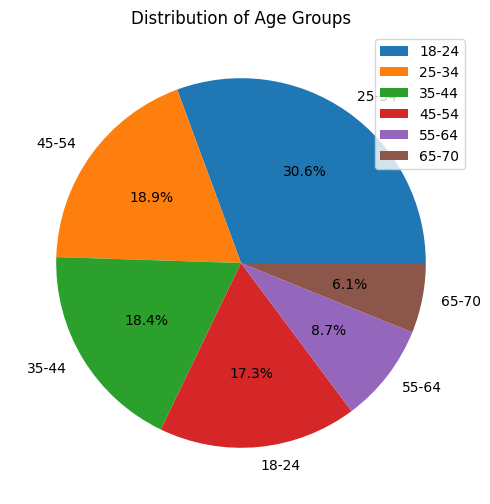

In [79]:
plt.figure(figsize=(8, 6))
plt.pie(df['Age Group'].value_counts(), labels=df['Age Group'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

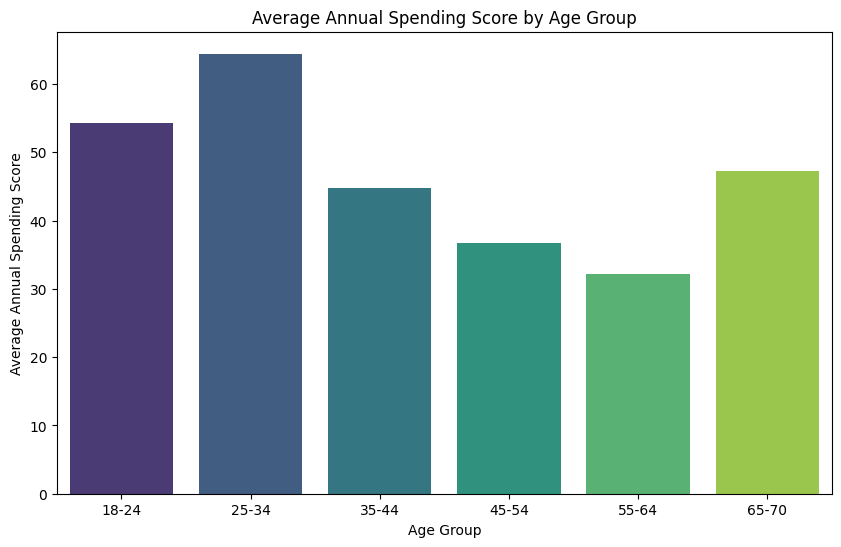

In [80]:
mean_scores = df.groupby('Age Group')['Spending Score (1-100)'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values,palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Spending Score')
plt.title('Average Annual Spending Score by Age Group')
plt.show()

In [81]:
df1 = pd.DataFrame({'Age Group': df['Age Group']})
column_to_drop = 'Age Group'
df.drop(column_to_drop, axis=1, inplace=True)

In [82]:
X= df.iloc[:, [2,3]].values

In [83]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

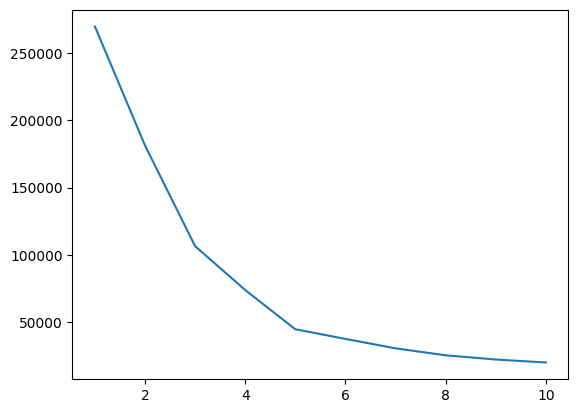

In [84]:
plt.plot(range(1,11),wcss)
plt.show()

In [85]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


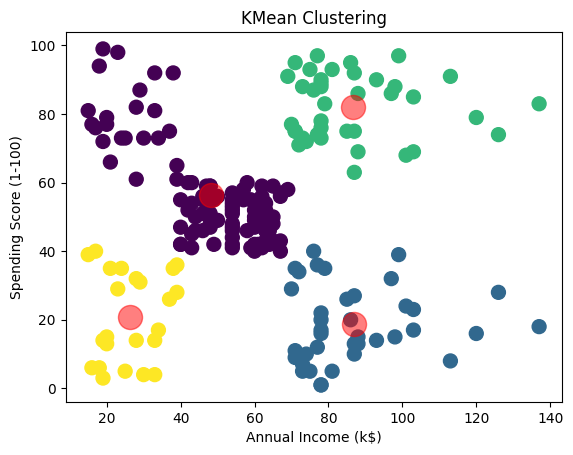

In [86]:
labels_km4 = km.labels_
centroids_km4 = km.cluster_centers_

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels_km4, s=100)
plt.scatter(x=centroids_km4[:, 0], y=centroids_km4[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMean Clustering')
plt.show()

In [87]:
inertia_score = km.inertia_
print("inertia_score of 4 clucters:",inertia_score)

inertia_score of 4 clucters: 73679.78903948836


In [88]:
silhouette_km4 = silhouette_score(X, labels_km4)
print("Silhouette Score  of 4 clusters:", silhouette_km4)

Silhouette Score  of 4 clusters: 0.4931963109249047


In [89]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


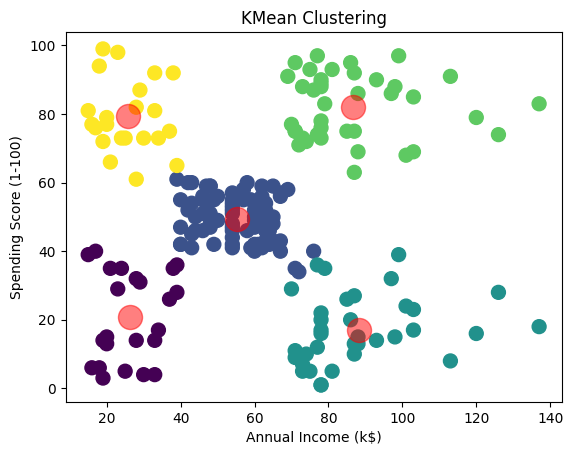

In [90]:
labels_km5 = km.labels_

centroids_km5 = km.cluster_centers_

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels_km5, s=100)
plt.scatter(x=centroids_km5[:, 0], y=centroids_km5[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMean Clustering')
plt.show()

In [91]:
inertia_score = km.inertia_
print("inertia_score of 5 clusters:",inertia_score)

inertia_score of 5 clusters: 44448.4554479337


In [92]:
silhouette_km5 = silhouette_score(X, labels_km5)
print("Silhouette Score  of 5 clusters:", silhouette_km5)

Silhouette Score  of 5 clusters: 0.553931997444648
